In [1]:
## boston house price

In [2]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [3]:
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
X=boston.data
y=boston.target


In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [6]:
estimator = Lasso(alpha=1.0)

In [7]:
estimator.fit(x_train, y_train)

Lasso()

In [8]:
from sklearn import metrics
y_predict = estimator.predict(x_train) 
score = metrics.r2_score(y_train, y_predict)
print(score)

0.668593128714059


In [9]:
y_predict = estimator.predict(x_test) 
score = metrics.r2_score(y_test, y_predict)
print(score)

0.7011043441524542


In [10]:
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import Ridge
from sklearn import metrics

from sklearn import datasets
dataset = datasets.load_boston()
XX = dataset.data
yy = dataset.target

In [11]:
x_train, x_test, y_train, y_test = train_test_split(XX, yy, test_size=0.3)

In [12]:
estimator = Ridge(alpha=1.0)

In [13]:
estimator.fit(x_train, y_train)

Ridge()

In [14]:
y_predict = estimator.predict(x_train) 
score = metrics.r2_score(y_train, y_predict)
print(score) 

0.7160246239562444


In [15]:
y_predict = estimator.predict(x_test) 
score = metrics.r2_score(y_test, y_predict)
print(score) 

0.7611423676198211


In [16]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Lasso, Ridge

import numpy as np
lasso = Lasso().fit(x_train, y_train)

In [17]:
print('{:.3f}'.format(lasso.score(x_train, y_train)))

0.663


In [18]:
print('{:.3f}'.format(lasso.score(x_test, y_test)))

0.647


In [19]:
print(lasso.coef_)

[-0.06696104  0.057646   -0.02048083  0.         -0.          0.
  0.01793249 -0.83028193  0.27723175 -0.01750175 -0.65555491  0.00755725
 -0.77338926]


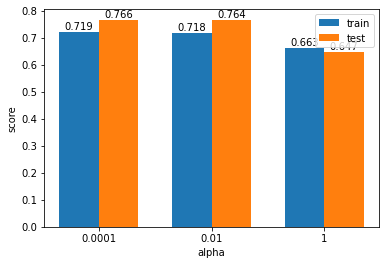

In [23]:
#alpha와 Ridge의 alpha값에 따른 특성의 값
import matplotlib.pyplot as plt

alpha_set = [0.0001, 0.01, 1]
max_inter_set = [10000000, 100000, 1000]

train_score = []

test_score = []

used_feature = []



for a, m in zip(alpha_set, max_inter_set):

    lasso = Lasso(alpha=a, max_iter=m).fit(x_train, y_train)

    la_tr_score = round(lasso.score(x_train, y_train), 3)

    la_te_score = round(lasso.score(x_test, y_test), 3)

    number_used = np.sum(lasso.coef_ != 0)



    train_score.append(la_tr_score)

    test_score.append(la_te_score)

    used_feature.append(number_used)



index = np.arange(len(alpha_set))

bar_width = 0.35

plt.bar(index, train_score, width=bar_width, label='train')

plt.bar(index+bar_width, test_score, width=bar_width, label='test')

plt.xticks(index+bar_width/2, alpha_set) 



for i, (ts, te) in enumerate(zip(train_score, test_score)):

    plt.text(i, ts+0.01, str(ts), horizontalalignment='center')

    plt.text(i+bar_width, te+0.01, str(te), horizontalalignment='center')



plt.legend(loc=1)

plt.xlabel('alpha')

plt.ylabel('score')

plt.show()

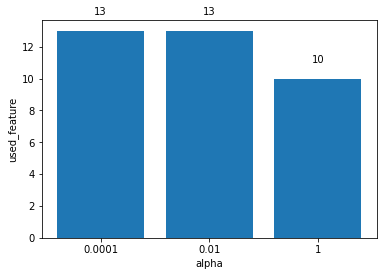

In [24]:
index = np.arange(len(alpha_set))

plt.bar(index, used_feature)

plt.xticks(index, alpha_set)

for i, u in enumerate(used_feature):

    plt.text(i, u+1, str(u), horizontalalignment='center')

plt.xlabel('alpha')

plt.ylabel('used_feature')

plt.show()

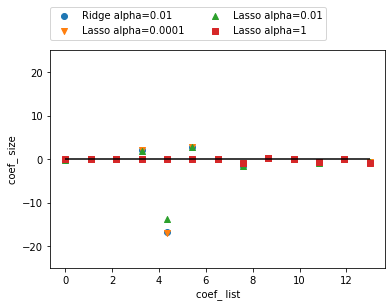

In [25]:
n_feature = X.shape[1]

line = np.linspace(0, n_feature, num=n_feature)

alpha_set = [0.0001, 0.01, 1]

max_iter_set = [10000000, 100000,1000]

marker_set = ['v', '^', 's']



ridge = Ridge(alpha=0.01).fit(x_train, y_train)

plt.scatter(line, ridge.coef_, marker='o', label='Ridge alpha={}'.format(0.01))



for a, i, m in zip(alpha_set, max_iter_set, marker_set):

    param = {'alpha':a, 'max_iter':i}

    lasso = Lasso(**param).fit(x_train, y_train)

    plt.scatter(line, lasso.coef_, marker=m, label='Lasso alpha={}'.format(a))

    

plt.legend(ncol=2, loc=(0, 1.05))

plt.ylim(-25, 25)

plt.hlines(y=0, xmin=0, xmax=n_feature)

plt.xlabel('coef_ list')

plt.ylabel('coef_ size')

plt.show()